In [1]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
#import nltk

import nltk
import seaborn as sns
%matplotlib inline
import random

  #  0-33 dataset 

## Creating padding in dataset of first quantile 

In [2]:
data_0_33=pd.read_csv("data_0_33_quantile.csv")

In [3]:
data_0_33['start']=data_0_33.groupby('user_id').session.shift(1)!=data_0_33.session

In [4]:
data_0_33['end']=data_0_33.groupby('user_id').session.shift(-1)!=data_0_33.session

In [5]:
user_corpus_0_33=data_0_33.groupby(['user_id','session']).package_name.apply(' '.join)

In [6]:
user_corpus_with_start_end_0_33='start '+user_corpus_0_33+ ' end'

## N-gram for first quantile

In [7]:
print("Number of sessions:",user_corpus_0_33.shape[0])
print("0.75% of sessions:",user_corpus_0_33.shape[0]/100*0.25)

Number of sessions: 41644131
0.75% of sessions: 104110.3275


In [8]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [9]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus_with_start_end_0_33.values)

In [10]:
frequent_apps=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>104110)[1]]
print("Number frequent apps:",len(frequent_apps))#77
frequent_apps

Number frequent apps: 77


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.discord', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grindrapp.android', 'com.grppl.android.shel

In [11]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus_0_33.values)
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>104110)[1]]))#134

Number of 2-grams: 134


In [12]:
length_2_patterns = vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>104110)[1]]
length_2_patterns

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.facebook.katana',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',
       'com.android.incallui com.whatsapp',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.androi

In [13]:
vectorizer_3gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization_3gram=vectorizer_3gram.fit_transform(user_corpus_0_33.values)
print("Number of 3-grams:",len(vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>104110)[1]]))#30
length_3_patterns = vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>104110)[1]]
length_3_patterns

Number of 3-grams: 30


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox com.facebook.katana',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp com.facebook.katana',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.whatsapp',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.instagram.android com.facebook.katana',
       'com.facebook.katana com.snapchat.android com.facebook.katana',
       'com.facebook.katana com.sonyericsson.conversations com.facebook.katana',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.facebook.orca com.facebook.katana com.facebook

In [14]:
vectorizer_4gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization_4gram=vectorizer_4gram.fit_transform(user_corpus_0_33.values)
print("Number of 4-grams:",len(vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]))
#vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]
length_4_patterns = vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]#4
length_4_patterns

Number of 4-grams: 4


array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana'],
      dtype=object)

In [15]:
vectorizer_5gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5))
vectorization_5gram=vectorizer_5gram.fit_transform(user_corpus_0_33.values)
print("Number of 5-grams:",len(vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>104110)[1]]))
#vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>191938)[1]]
length_5_patterns = vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>104110)[1]]
length_5_patterns

Number of 5-grams: 0


array([], dtype=object)

## Transition matrix for 0-33 dataset 

In [16]:
frequent_apps_without_start_end=set(frequent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [17]:
df_frequent_app_count = data_0_33[data_0_33.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [18]:
data_0_33['next_app'] = data_0_33.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [19]:
df_next_app_count=data_0_33[data_0_33.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [20]:
frequent_apps_without_start=set(frequent_apps)
frequent_apps_without_start.remove("start")

In [21]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps_without_start)].reset_index()

In [23]:
df_frequent_app_count=df_frequent_app_count.append(pd.DataFrame(data_0_33.start.sum(),columns=['app_count'],index=['start']))

In [24]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [25]:
start_numerator=data_0_33[(data_0_33.start)&(data_0_33.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [26]:
df_numerator=df_numerator.append(start_numerator)

In [27]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [28]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [29]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

Transaction_matrix=Transaction_matrix.fillna(0)

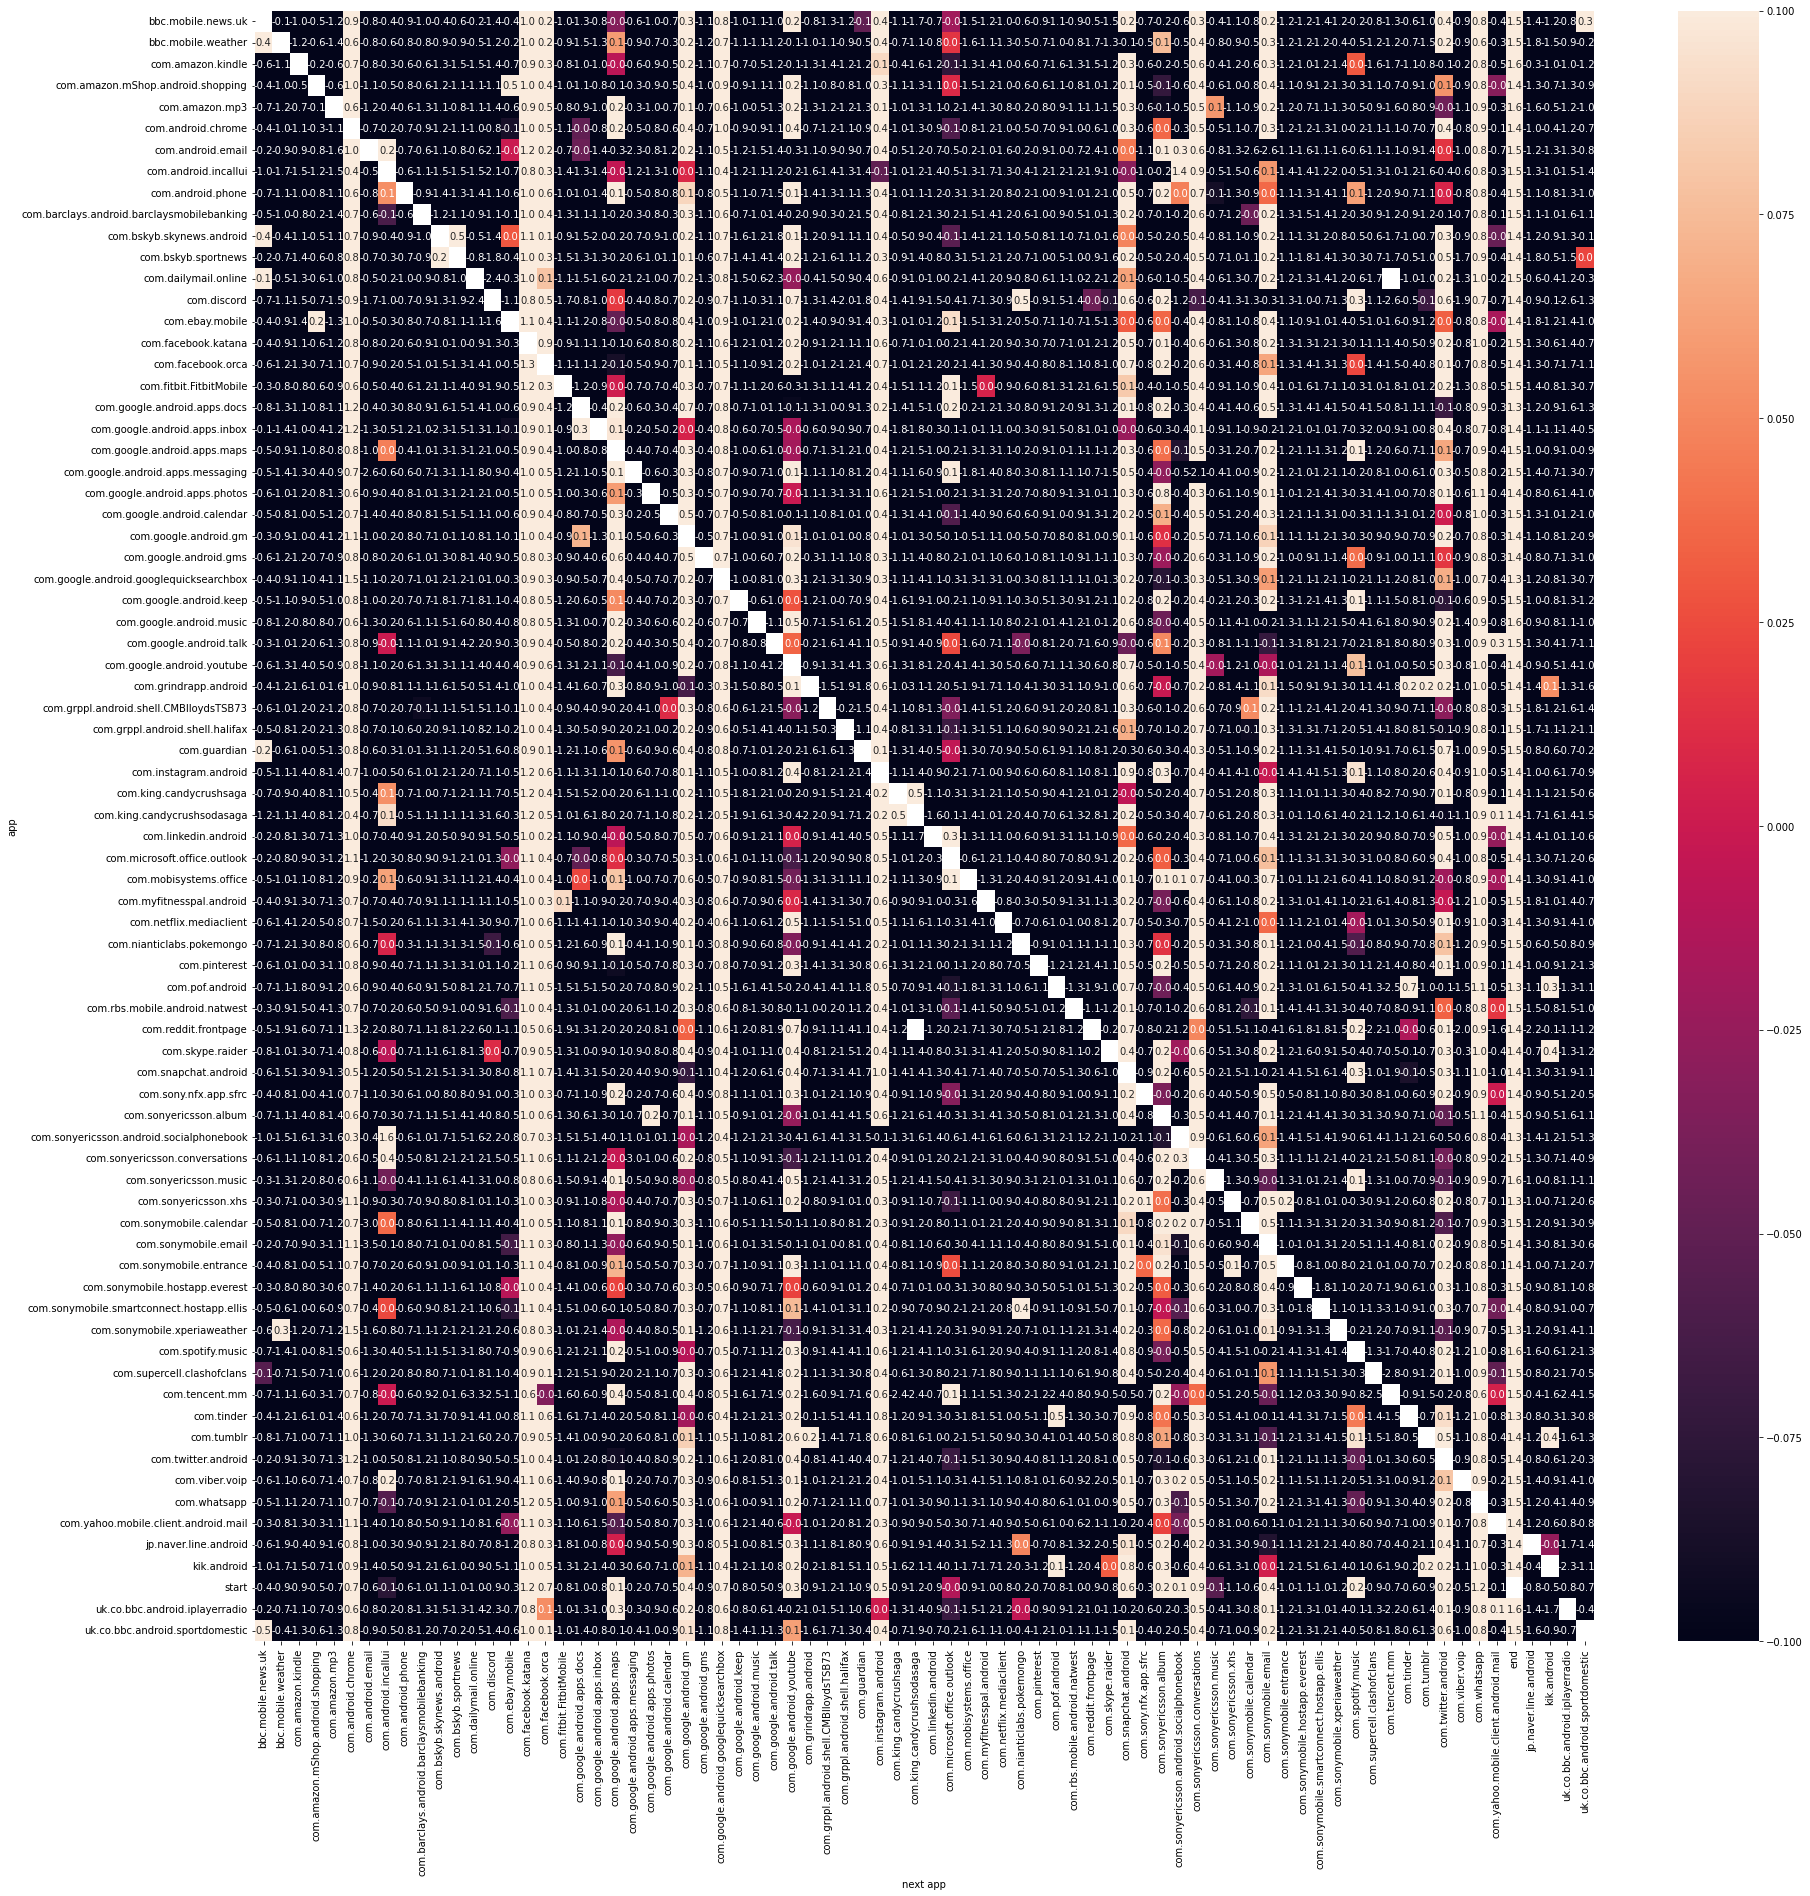

In [30]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

In [47]:
Transaction_matrix.to_csv("Transaction_matrix_0_33_quantile_median_sleeptime.csv",index='False')

# 33-66 dataset 

In [33]:
data_33_66=pd.read_csv("data_33_66_quantile.csv")

In [34]:
data_33_66['start']=data_33_66.groupby('user_id').session.shift(1)!=data_33_66.session

In [35]:
data_33_66['end']=data_33_66.groupby('user_id').session.shift(-1)!=data_33_66.session

In [36]:
user_corpus_33_66=data_33_66.groupby(['user_id','session']).package_name.apply(' '.join)

In [37]:
user_corpus_with_start_end_33_66='start '+user_corpus_33_66+ ' end'

## N-gram of 33-66 dataset

In [38]:
print("Number of sessions:",user_corpus_33_66.shape[0])
print("0.75% of sessions:",user_corpus_33_66.shape[0]/100*0.25)

Number of sessions: 7886073
0.75% of sessions: 19715.1825


In [39]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [40]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus_with_start_end_33_66.values)

In [41]:
frequent_apps=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>19715)[1]]
print("Number frequent apps:",len(frequent_apps))#68
frequent_apps

Number frequent apps: 68


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.aol.mobile.aolapp',
       'com.barclays.android.barclaysmobilebanking', 'com.bskyb.fbscore',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.fitbit.FitbitMobile',
       'com.google.android.apps.docs', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',
       'com.grppl.android.shell.hal

In [42]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus_33_66.values)
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>19715)[1]]))#95

Number of 2-grams: 95


In [43]:
length_2_patterns = vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>19715)[1]]
length_2_patterns

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.apps.maps',
       'com.facebook.katana com.google.android.gm',
       'com.facebook.katana com.google.android.googlequicksearchbox',
      

In [44]:
vectorizer_3gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization_3gram=vectorizer_3gram.fit_transform(user_corpus_33_66.values)
print("Number of 3-grams:",len(vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>19715)[1]]))#30
length_3_patterns = vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>19715)[1]]
length_3_patterns

Number of 3-grams: 14


array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.sonyericsson.conversations com.facebook.katana',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.facebook.orca com.facebook.katana com.facebook.orca',
       'com.google.android.googlequicksearchbox com.android.chrome com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.sonyericsson.android.socialphonebook com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations com.facebook.katana com.sonyericsson.conversations',
       'com.whatsapp com.android.chrome com.whatsapp',
       'com.whatsa

In [45]:
vectorizer_4gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization_4gram=vectorizer_4gram.fit_transform(user_corpus_33_66.values)
print("Number of 4-grams:",len(vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>19715)[1]]))
#vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]
length_4_patterns = vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>19715)[1]]#4
length_4_patterns

Number of 4-grams: 1


array(['com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome'],
      dtype=object)

In [46]:
vectorizer_5gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5))
vectorization_5gram=vectorizer_5gram.fit_transform(user_corpus_33_66.values)
print("Number of 5-grams:",len(vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>19715)[1]]))
#vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>191938)[1]]
length_5_patterns = vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>19715)[1]]
length_5_patterns

Number of 5-grams: 0


array([], dtype=object)

## Transition Matrix for 33-66 dataset 

In [48]:
frequent_apps_without_start_end=set(frequent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [49]:
df_frequent_app_count = data_33_66[data_33_66.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [50]:
data_33_66['next_app'] = data_33_66.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [51]:
df_next_app_count=data_33_66[data_33_66.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [52]:
frequent_apps_without_start=set(frequent_apps)
frequent_apps_without_start.remove("start")

In [53]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps_without_start)].reset_index()

In [54]:
df_frequent_app_count=df_frequent_app_count.append(pd.DataFrame(data_33_66.start.sum(),columns=['app_count'],index=['start']))

In [55]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [56]:
start_numerator=data_33_66[(data_33_66.start)&(data_33_66.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [57]:
df_numerator=df_numerator.append(start_numerator)

In [58]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [59]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [60]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

Transaction_matrix=Transaction_matrix.fillna(0)

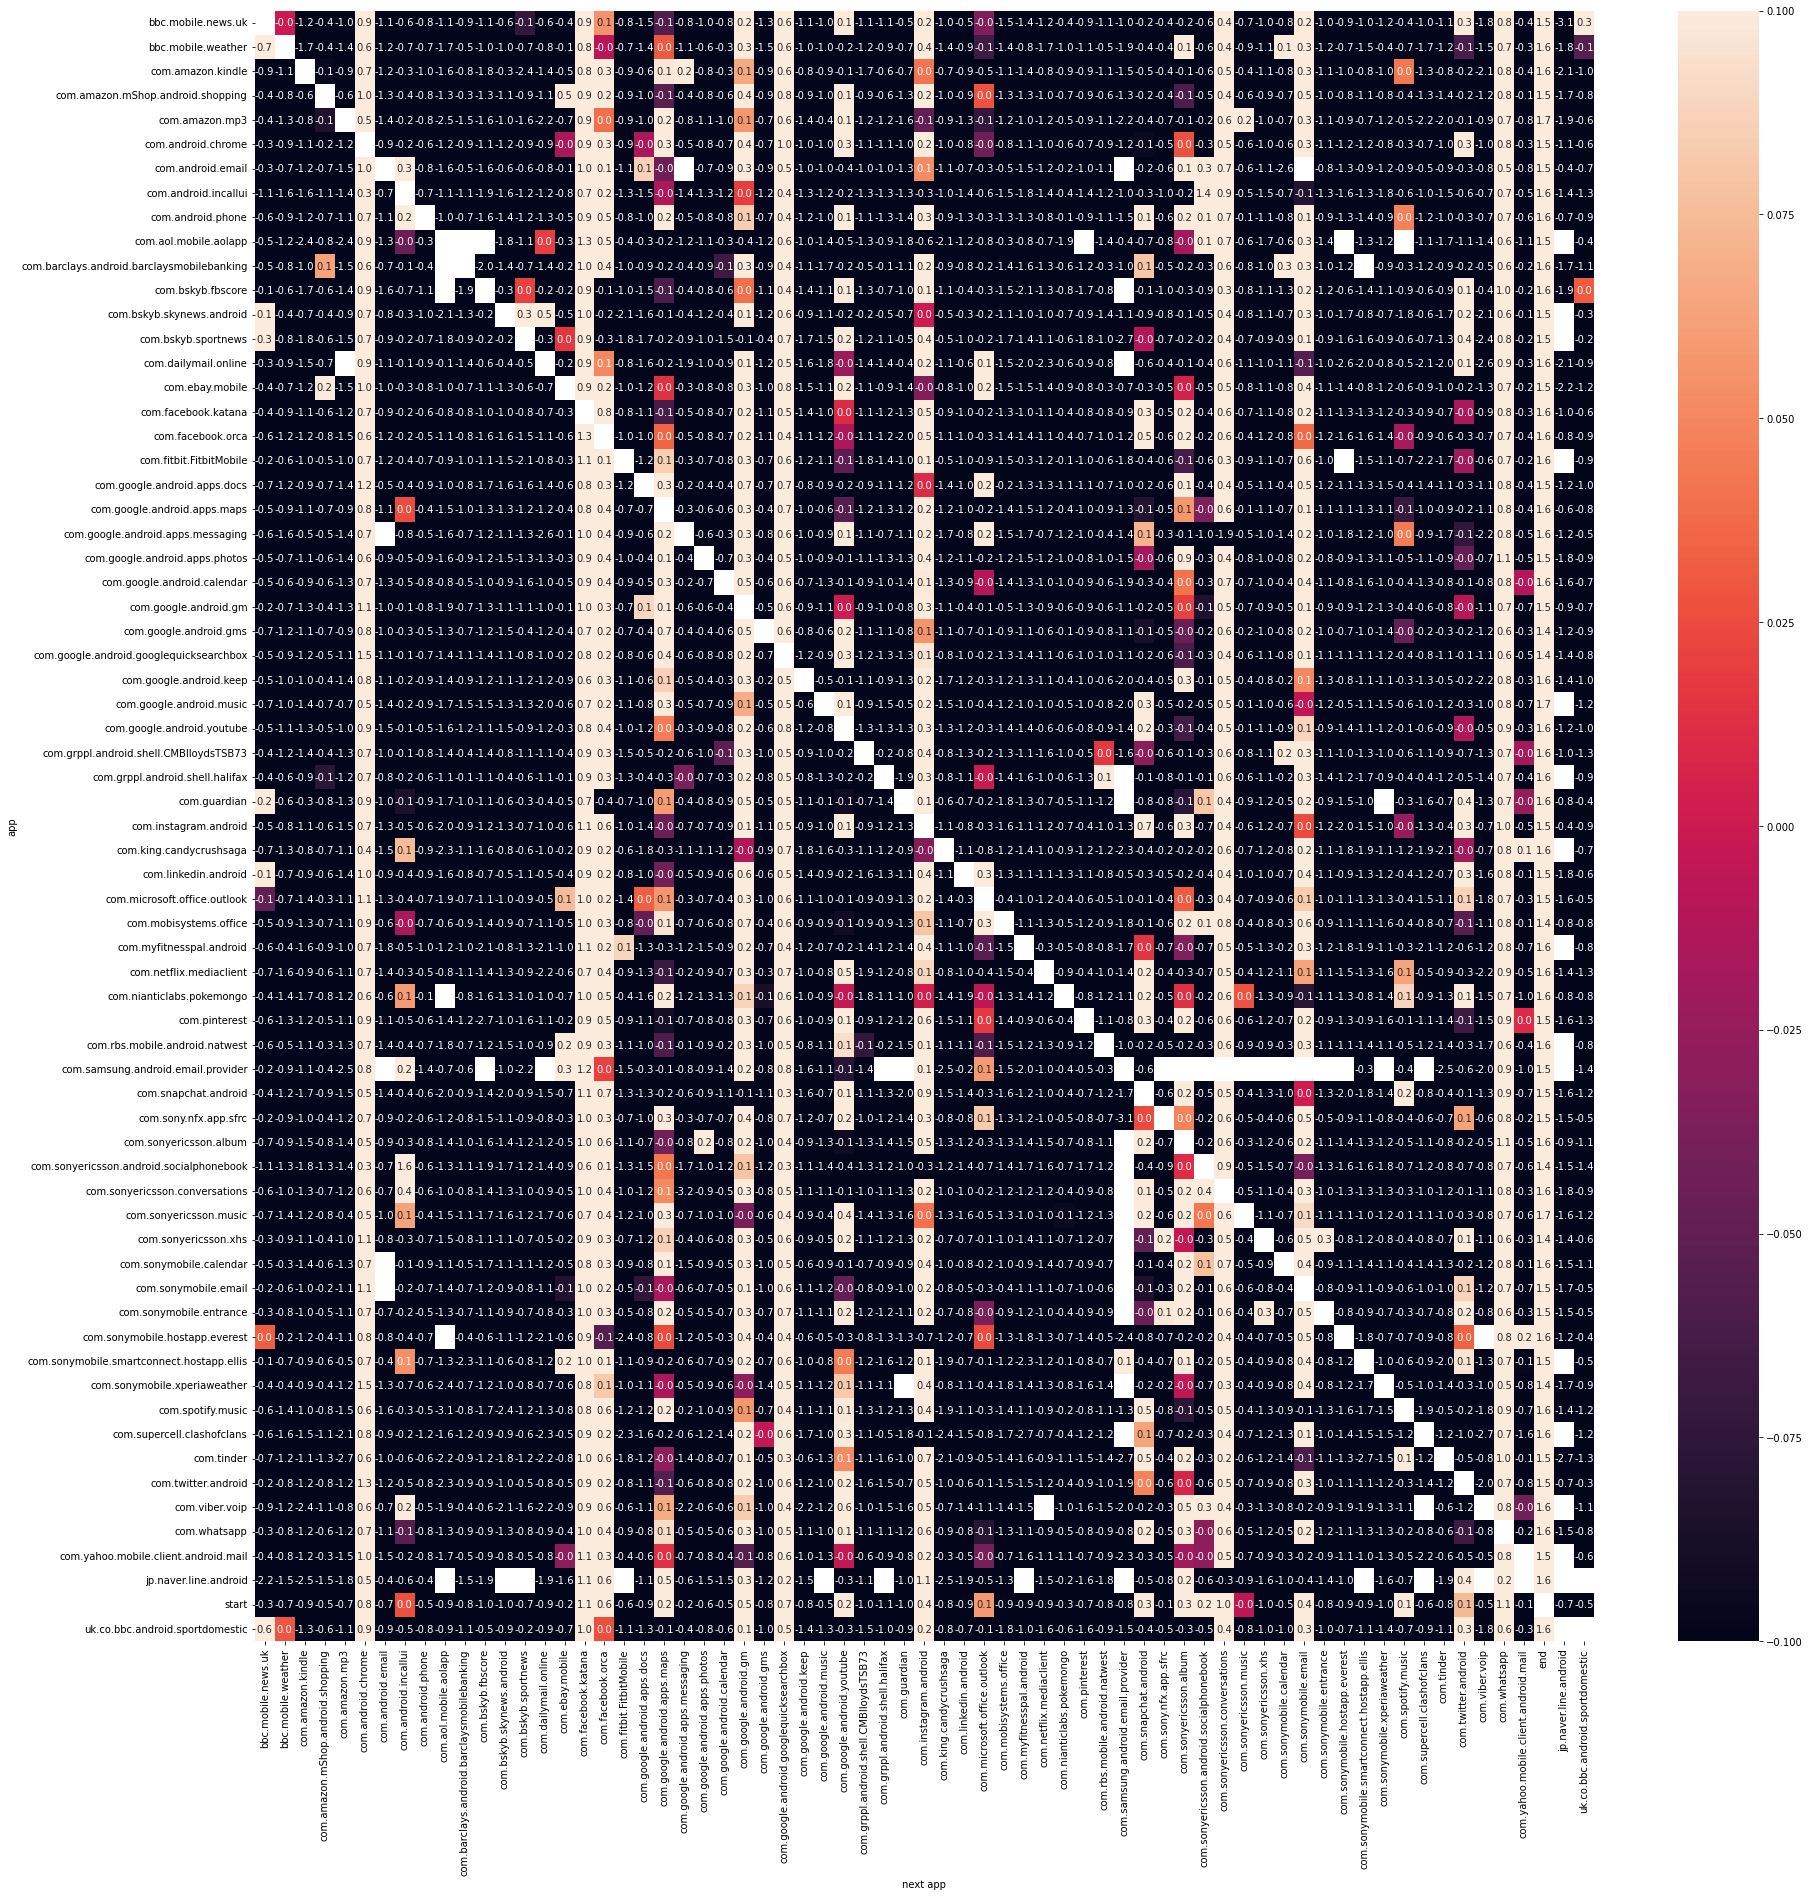

In [61]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

In [62]:
Transaction_matrix.to_csv("Transaction_matrix_33_66_quantile_median_sleeptime.csv",index='False')

# 66-100 dataset

## Creating padding in dataset of last quantile

In [3]:
data_66_100=pd.read_csv("data_66_100_quantile.csv")

In [4]:
data_66_100['start']=data_66_100.groupby('user_id').session.shift(1)!=data_66_100.session

In [5]:
data_66_100['end']=data_66_100.groupby('user_id').session.shift(-1)!=data_66_100.session

In [6]:
user_corpus_66_100=data_66_100.groupby(['user_id','session']).package_name.apply(' '.join)

In [7]:
user_corpus_with_start_end_66_100='start '+user_corpus_66_100+ ' end'

## N-grams

In [8]:
print("Number of sessions:",user_corpus_66_100.shape[0])
print("0.75% of sessions:",user_corpus_66_100.shape[0]/100*0.25)

Number of sessions: 27244918
0.75% of sessions: 68112.295


In [9]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [10]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus_with_start_end_66_100.values)

In [ ]:
frequent_apps=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>104110)[1]]
print("Number frequent apps:",len(frequent_apps))#77
frequent_apps

In [ ]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus_66_100.values)
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>104110)[1]]))#134